In [1]:
import numpy as np
import pandas as pd
import sklearn
from sklearn import preprocessing

In [2]:
data = pd.read_csv(r'E:/RGU_PhD/SINCONF/Dataset/UNSW-NB15_1.csv')
data.head(5)

C:\Users\HP\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3057: DtypeWarning: Columns (1,3,47) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


,srcip,sport,dstip,dsport,proto,state,dur,sbytes,dbytes,sttl,...,ct_ftp_cmd,ct_srv_src,ct_srv_dst,ct_dst_ltm,ct_src_ ltm,ct_src_dport_ltm,ct_dst_sport_ltm,ct_dst_src_ltm,attack_cat,Label
0,59.166.0.0,1390,149.171.126.6,53,udp,CON,0.001055,132,164,31,...,0,3,7,1,3,1,1,1,NaN,0
1,59.166.0.0,33661,149.171.126.9,1024,udp,CON,0.036133,528,304,31,...,0,2,4,2,3,1,1,2,NaN,0
2,59.166.0.6,1464,149.171.126.7,53,udp,CON,0.001119,146,178,31,...,0,12,8,1,2,2,1,1,NaN,0
3,59.166.0.5,3593,149.171.126.5,53,udp,CON,0.001209,132,164,31,...,0,6,9,1,1,1,1,1,NaN,0
4,59.166.0.3,49664,149.171.126.0,53,udp,CON,0.001169,146,178,31,...,0,7,9,1,1,1,1,1,NaN,0


In [3]:
df_new =data
df_new.head(2)

,srcip,sport,dstip,dsport,proto,state,dur,sbytes,dbytes,sttl,...,ct_ftp_cmd,ct_srv_src,ct_srv_dst,ct_dst_ltm,ct_src_ ltm,ct_src_dport_ltm,ct_dst_sport_ltm,ct_dst_src_ltm,attack_cat,Label
0,59.166.0.0,1390,149.171.126.6,53,udp,CON,0.001055,132,164,31,...,0,3,7,1,3,1,1,1,NaN,0
1,59.166.0.0,33661,149.171.126.9,1024,udp,CON,0.036133,528,304,31,...,0,2,4,2,3,1,1,2,NaN,0


In [4]:
df_new= df_new.drop(['attack_cat'],axis=1)

In [5]:
from sklearn.preprocessing import LabelEncoder
cat_feature = df_new.select_dtypes(include=['category', object]).columns
df_new[cat_feature] = df_new[cat_feature].astype(str)
df_new[cat_feature] = df_new[cat_feature].apply(LabelEncoder().fit_transform)
df_new.head(3)

,srcip,sport,dstip,dsport,proto,state,dur,sbytes,dbytes,sttl,...,is_ftp_login,ct_ftp_cmd,ct_srv_src,ct_srv_dst,ct_dst_ltm,ct_src_ ltm,ct_src_dport_ltm,ct_dst_sport_ltm,ct_dst_src_ltm,Label
0,30,4272,22,45600,120,2,0.001055,132,164,31,...,0,0,3,7,1,3,1,1,1,0
1,30,26018,25,239,120,2,0.036133,528,304,31,...,0,0,2,4,2,3,1,1,2,0
2,36,5087,23,45600,120,2,0.001119,146,178,31,...,0,0,12,8,1,2,2,1,1,0


In [6]:
df_new = df_new.replace([np.inf, -np.inf], np.nan).dropna()
df_new.head(3)

,srcip,sport,dstip,dsport,proto,state,dur,sbytes,dbytes,sttl,...,is_ftp_login,ct_ftp_cmd,ct_srv_src,ct_srv_dst,ct_dst_ltm,ct_src_ ltm,ct_src_dport_ltm,ct_dst_sport_ltm,ct_dst_src_ltm,Label
0,30,4272,22,45600,120,2,0.001055,132,164,31,...,0,0,3,7,1,3,1,1,1,0
1,30,26018,25,239,120,2,0.036133,528,304,31,...,0,0,2,4,2,3,1,1,2,0
2,36,5087,23,45600,120,2,0.001119,146,178,31,...,0,0,12,8,1,2,2,1,1,0


In [8]:
df_new = df_new.drop(['swin', 'Stime'], axis=1)

In [9]:
df_new.shape

(700001, 46)

In [10]:
from sklearn.model_selection import train_test_split
y = df_new.Label
X = df_new.drop(['Label'],axis=1)

In [11]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.3)

In [12]:
from sklearn.tree import DecisionTreeClassifier

In [13]:
dt = DecisionTreeClassifier()
dt.fit(X_train,y_train)

DecisionTreeClassifier()

In [14]:
dt.score(X_test,y_test)

0.9982809605668544

In [15]:
y_pred = dt.predict(X_test)


In [16]:
from sklearn.metrics import classification_report, confusion_matrix
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

[[203177    175]
 [   186   6463]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00    203352
           1       0.97      0.97      0.97      6649

    accuracy                           1.00    210001
   macro avg       0.99      0.99      0.99    210001
weighted avg       1.00      1.00      1.00    210001



In [17]:
from sklearn.metrics import confusion_matrix


In [18]:
cf_matrix= confusion_matrix(y_test, y_pred)
cf_matrix

array([[203177,    175],
       [   186,   6463]], dtype=int64)

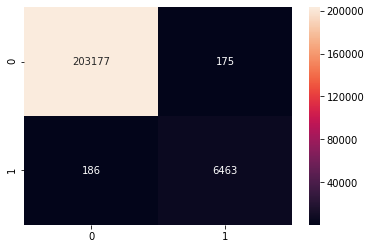

In [20]:
import seaborn as sns
import matplotlib.pyplot as plt
# group_names = ['True Neg','False Pos','False Neg','True Pos']
# group_counts = ["{0:0.0f}".format(value) for value in cf_matrix.flatten()]
# group_percentages = ["{0:.2%}".format(value) for value in cf_matrix.flatten()/np.sum(cf_matrix)]
# labels = [f"{v1}\n{v2}" for v1, v2 in zip(group_names,group_counts)]
# labels = np.asarray(labels).reshape(2,2)


sns.heatmap(cf_matrix, annot=True, fmt='')
plt.savefig("plots_UNSW.pdf")
